In [1]:
import mlflow
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from plot_keras_history import show_history

from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

(60000, 784) train input samples
(10000, 784) test input samples


In [3]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


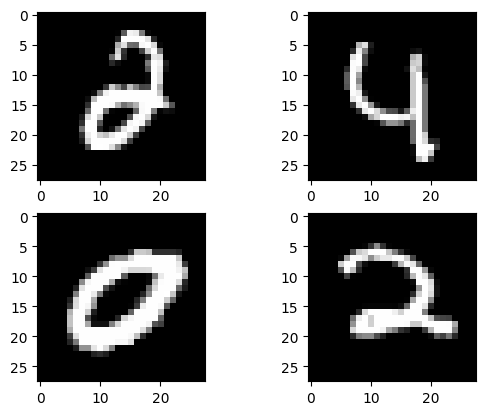

In [4]:
plt.subplot(221)
plt.imshow(X_train[np.random.randint(0, len(X_train))], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[np.random.randint(0, len(X_train))], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[np.random.randint(0, len(X_train))], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[np.random.randint(0, len(X_train))], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
def build_basic_nn(params):
    mlp = Sequential([
        Dense(params["layer1_size"], activation=params['activation'], kernel_regularizer=params['regularizers'], input_shape=(784,)),
        Dropout(params["dropout_rate_l1"]),
        Dense(params["layer2_size"], activation=params['activation'], kernel_regularizer=params['regularizers']),
        Dropout(params["dropout_rate_l2"]),
        Dense(params["output_size"], activation='softmax')
    ])
    return mlp

In [6]:
def train_mlp(mlp, train_params, x_train, y_train):

    if train_params["use_optimiser"] == True:
        opt_new = keras.optimizers.SGD(learning_rate=train_params["learning_rate"], momentum=train_params["momentum"])
        mlp.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt_new)
    else:
        mlp.compile(loss='categorical_crossentropy', metrics=['accuracy'])

    
    
    if train_params["early_stopping"] == True:
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.keras")
        history = mlp.fit(x_train, y_train, epochs=train_params["num_epochs"], validation_data=(x_test, y_test), callbacks=[checkpoint])
        es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2)
        mlp.fit(x_train, y_train, epochs=train_params["num_epochs"], validation_data=(x_test, y_test), callbacks=[es], batch_size=train_params["batch_size"])
    else:
        history = mlp.fit(x_train, y_train, epochs=train_params["num_epochs"], validation_data=(x_test, y_test), batch_size=train_params["batch_size"])
        
    show_history(history)
    
    return mlp


In [7]:
def mlp_run(
    mlp_params,
    train_params,
    x_train, 
    y_train,
    x_test,
    y_test,
):
    model = build_basic_nn(mlp_params)
    model = train_mlp(model, train_params, x_train, y_train)

    loss, acc = model.evaluate(x_train, y_train, verbose=2)
    print("Train accuracy: {:5.2f}%".format(100*acc))

    loss, acc = model.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy: {:5.2f}%".format(100*acc))

    return model

In [8]:
def predict(img, model):
    img = img.reshape(1, 784)
    img = img.astype('float32')
    img = img / 255
    probs = model.predict(img, verbose=True)
    print("Predicted Digit:", np.argmax(probs))
    return np.argmax(probs)

____________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________

## Bigger Neural Network

Epoch 1/10


c:\Users\18arj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8071 - loss: 0.7001 - val_accuracy: 0.9381 - val_loss: 0.2036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9424 - loss: 0.1913 - val_accuracy: 0.9533 - val_loss: 0.1465
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1251 - val_accuracy: 0.9674 - val_loss: 0.1070
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9723 - loss: 0.0919 - val_accuracy: 0.9717 - val_loss: 0.0912
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9785 - loss: 0.0712 - val_accuracy: 0.9752 - val_loss: 0.0834
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0545 - val_accuracy: 0.9780 - val_loss: 0.0706
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0452 - val_accuracy: 0.9779 - val_loss: 0.0693
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0374 - val_accurac

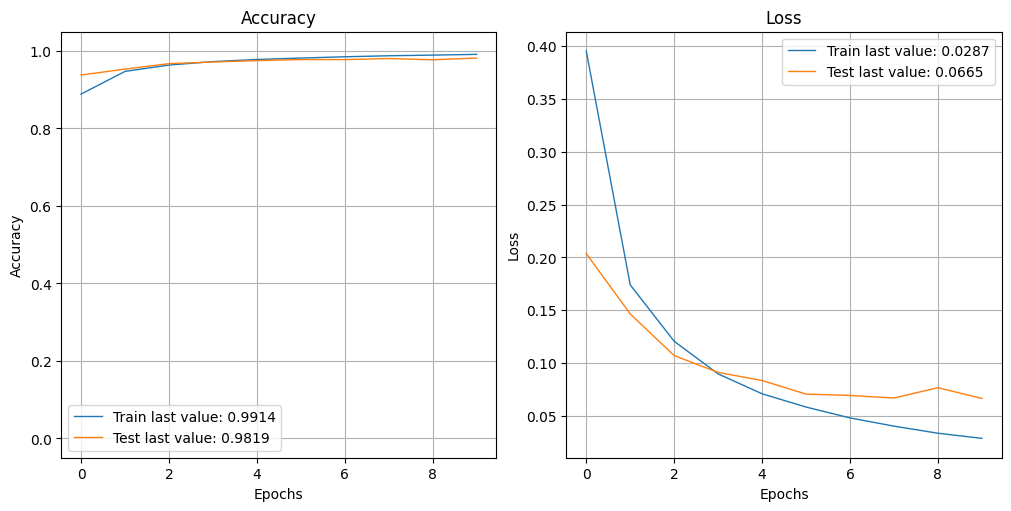

1875/1875 - 2s - 1ms/step - accuracy: 0.9949 - loss: 0.0189
Train accuracy: 99.49%
313/313 - 0s - 1ms/step - accuracy: 0.9819 - loss: 0.0665
Test accuracy: 98.19%


In [9]:
mlp_params = {
    "layer1_size": 256,
    "dropout_rate_l1": 0,
    "layer2_size": 128,
    "dropout_rate_l2": 0,
    "output_size": 10,
    "activation": 'sigmoid',
    "regularizers": None,
}

train_params = dict(
    use_optimiser=False,
    learning_rate=0.1,
    momentum=0.0, 
    num_epochs=10,
    early_stopping=False,
    batch_size=32,
)

model = mlp_run(
    mlp_params,
    train_params,
    x_train, 
    y_train,
    x_test,
    y_test,
)

In [10]:
model.save('model_to_use.h5')
model.save_weights('model_weights.weights.h5')

# Save model architecture
with open('model_to_use.json', 'w') as f:
    f.write(model.to_json())

In [11]:
image = X_test[np.random.randint(0, len(X_test))]
predict(image, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Digit: 2


2

____________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________